In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Insurance%20Premium%20Prediction/insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.head(5).T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.8,33.0,22.7,28.9
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
expenses,16884.92,1725.55,4449.46,21984.47,3866.86


In [7]:
df.tail(10).T

,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,23,52,57,23,52,50,18,18,21,61
sex,female,male,female,female,female,male,female,female,female,female
bmi,24.2,38.6,25.7,33.4,44.7,31.0,31.9,36.9,25.8,29.1
children,2,2,2,0,3,3,0,0,0,0
smoker,no,no,no,no,no,no,no,no,no,yes
region,northeast,southwest,southeast,southwest,southwest,northwest,northeast,southeast,southwest,northwest
expenses,22395.74,10325.21,12629.17,10795.94,11411.69,10600.55,2205.98,1629.83,2007.95,29141.36


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region']


In [10]:
df.isnull().apply(lambda x : [ sum(x), (sum(x) * 100) / df.shape[0]] )

,age,sex,bmi,children,smoker,region,expenses
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [12]:
from scipy.stats import kurtosis, skew, stats
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("skew:  {}".format(skew(df['expenses'])))
print("kurtosis:  {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
skew:  1.5141797167430497
kurtosis:  1.5958213684180036
missing charges values: 0
missing smoker values: 0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


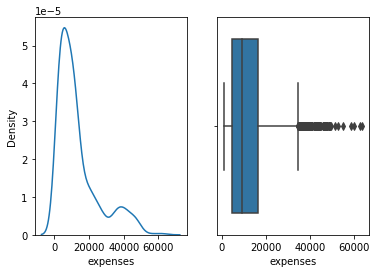

In [13]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1])
plt.show()

In [14]:
insur_corr=df.corr()
insur_corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [15]:
insur_cov=df.cov()
insur_cov

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


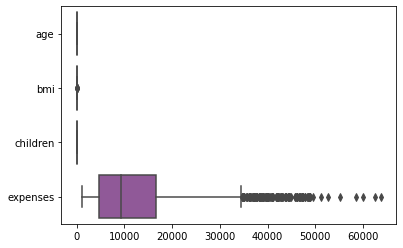


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  9
[49.1, 48.1, 47.5, 47.4, 50.4, 47.6, 52.6, 47.7, 53.1]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  expenses  Outliers count  139
[39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36, 38709.18, 37742.58, 47496.49, 37165.16, 39836.52, 43578.94, 47291.06, 47055.53, 39556.49, 40720.55, 36950.26, 36149.48, 48824.45, 43753.34, 37133.9, 34779.62, 38511.63, 35160.13, 47305.31, 44260.75, 41097.16, 43921.18, 36219.41, 46151.12, 42856.84, 48549.18, 47896.79, 42112.24, 38746.36, 42124.52, 34838.87, 35491.64, 42760.5, 47928.03, 48517.56, 41919.1, 36085.22, 38126.25, 42303.69, 46889.26, 46599.11, 39125.33, 37079.37, 35147.53, 48885.14, 36197.7, 38245.59, 48675.52, 63770.43, 45863.21, 39983.43, 45702.02, 58571.07, 43943.88, 39241.44, 42969.85, 40182.25, 34617.84, 42983.46, 42560.43, 40003.33, 45710.21, 46200.99, 46130.53, 40103.89, 34806.47,

In [16]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)
x=df[numeric_columns]
outlier_detect(x)

In [17]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [18]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
df.rename(columns={'sex': 'gender'}, inplace=True, level=None)
df.gender.value_counts()

male      676
female    662
Name: gender, dtype: int64

In [20]:
df.duplicated().sum()

1

In [21]:
df = df.drop_duplicates()
df.duplicated().sum()

0

<AxesSubplot:ylabel='Frequency'>

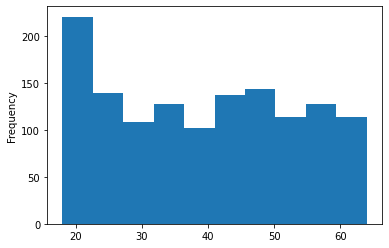

In [22]:
df.age.plot(kind="hist")

In [23]:
df.smoker.count()

1337

Text(0, 0.5, 'count')

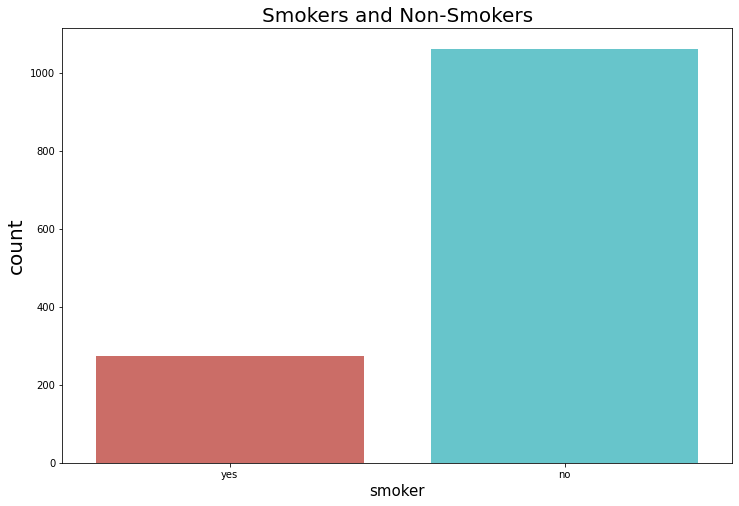

In [24]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

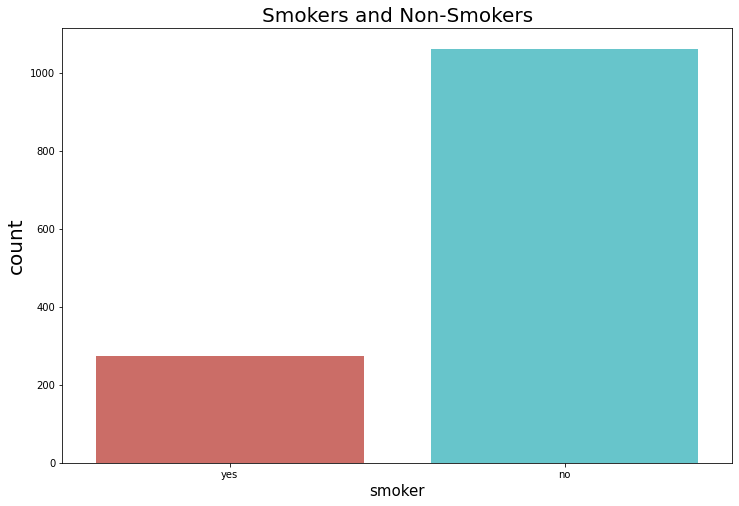

In [25]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- bmi')

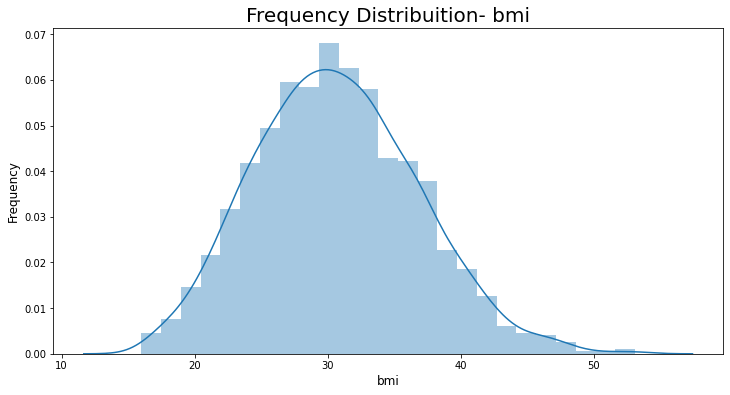

In [26]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["bmi"])
g.set_xlabel("bmi", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- bmi", fontsize=20)

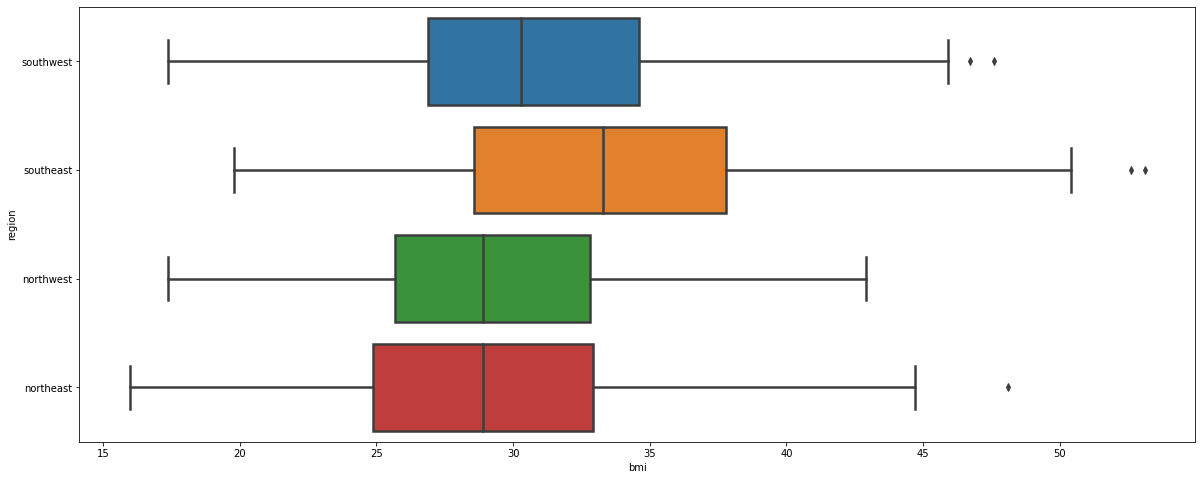

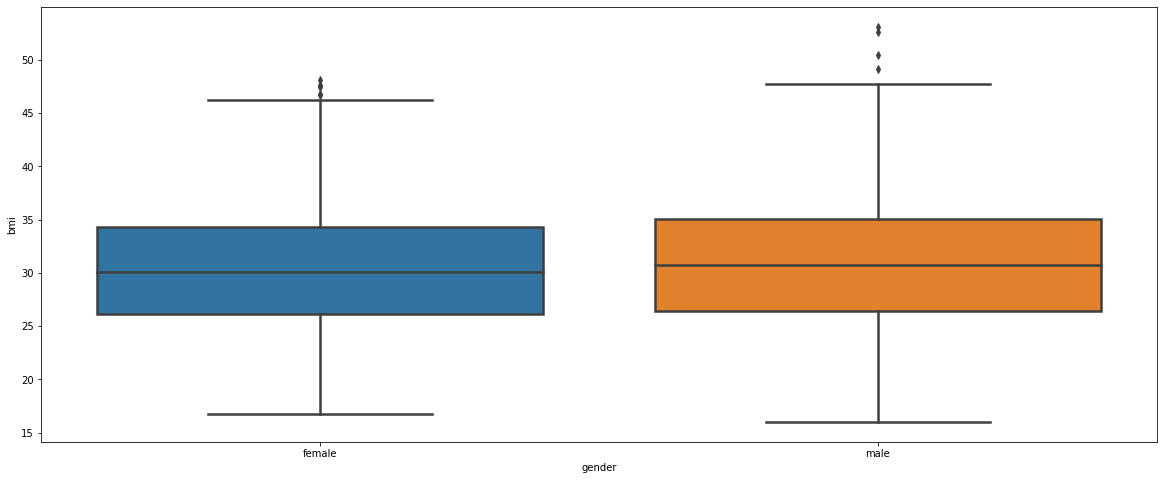

<AxesSubplot:ylabel='Frequency'>

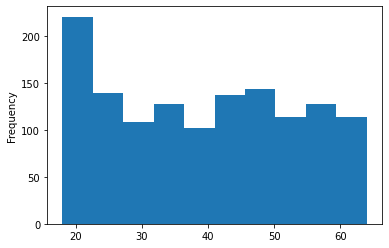

In [27]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="bmi" ,y="region", data=df, linewidth=2.5)
plt.show()

plt.figure(figsize = (20,8))
ax = sns.boxplot(x="gender" ,y="bmi", data=df, linewidth=2.5)
plt.show()

df.age.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

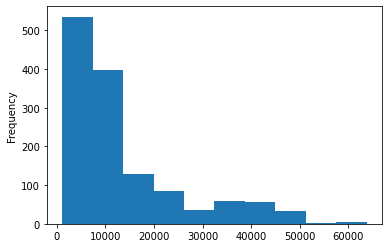

In [28]:
df.expenses.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

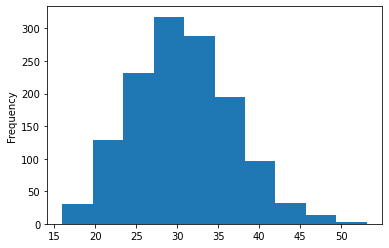

In [29]:
df.bmi.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

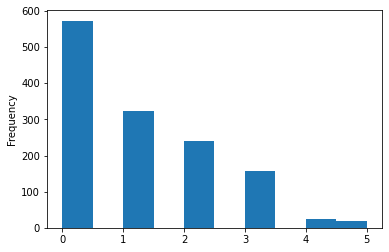

In [30]:
df.children.plot(kind="hist")

<AxesSubplot:ylabel='region'>

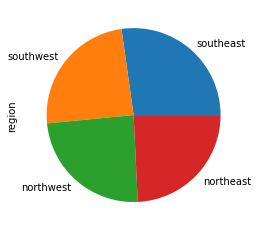

In [31]:
df.region.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='smoker'>

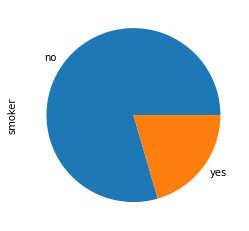

In [32]:
df.smoker.value_counts().plot(kind="pie")

In [33]:
df.groupby("smoker").expenses.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8440.660461,7345.73,1063
yes,32050.231971,34456.35,274


In [34]:
df.groupby("gender").expenses.agg(["mean","median","count"])

,mean,median,count
gender,,,
female,12569.578897,9412.965,662
male,13974.999111,9377.900,675


In [35]:
df.groupby("smoker").age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

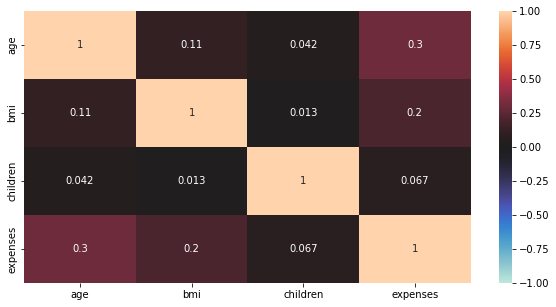

In [36]:
plt.figure(figsize=(10,5))
corr = df.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

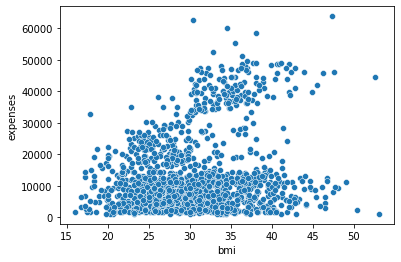

In [37]:
sns.scatterplot(x=df['bmi'], y=df['expenses'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

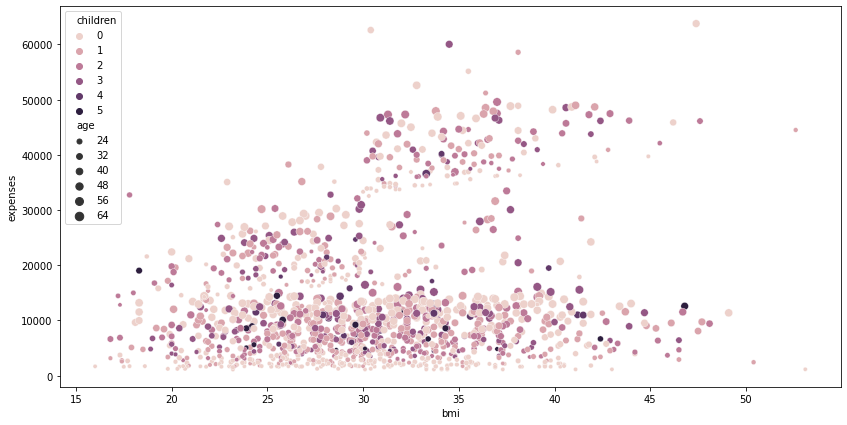

In [38]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['children'],size=df['age'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

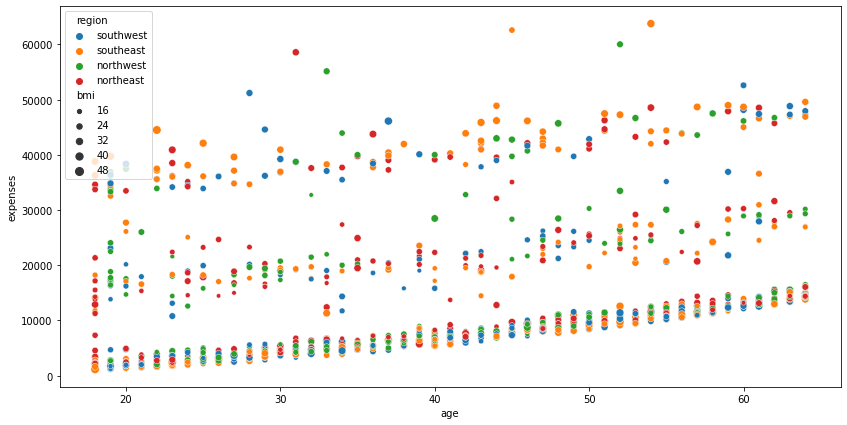

In [39]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['region'],size=df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

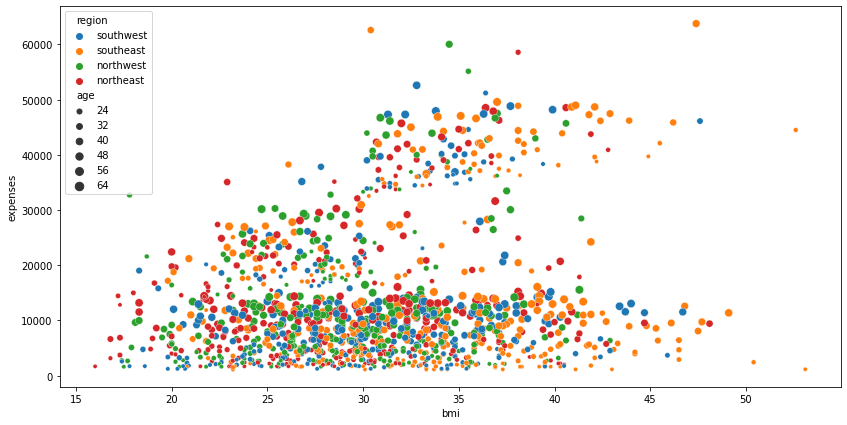

In [40]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['region'],size=df['age'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

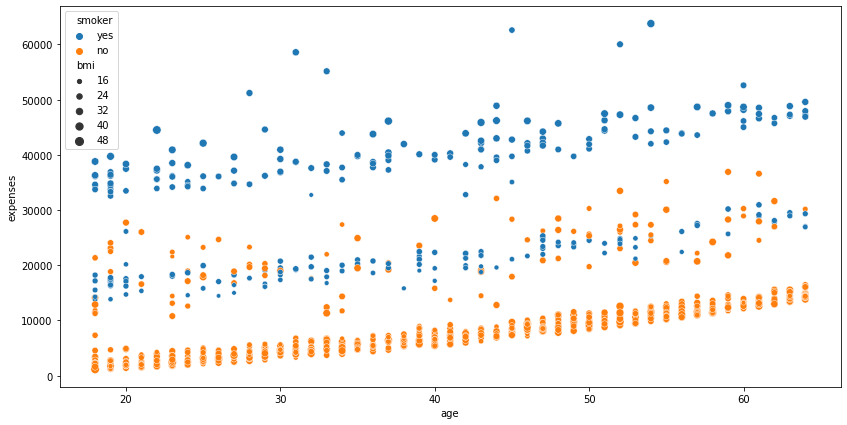

In [41]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['expenses'],hue=df['smoker'],size=df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

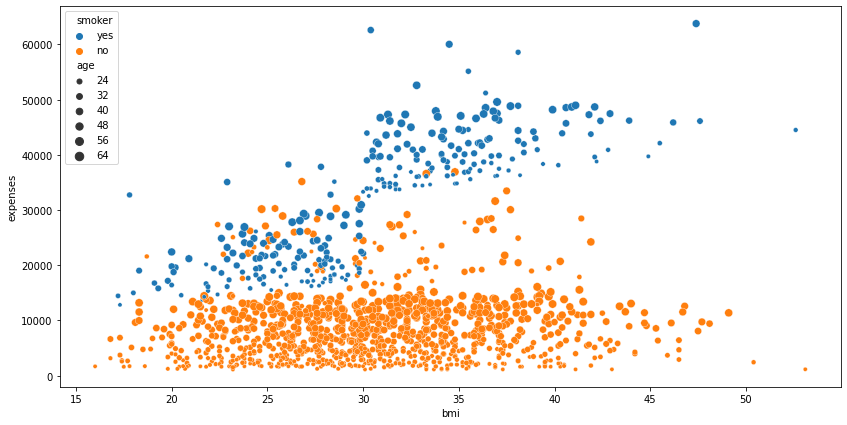

In [42]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['smoker'],size=df['age'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

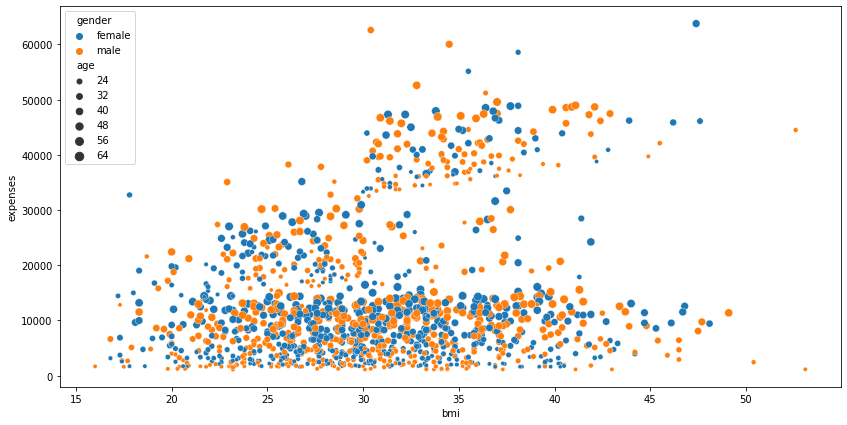

In [43]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['expenses'],hue=df['gender'],size=df['age'])

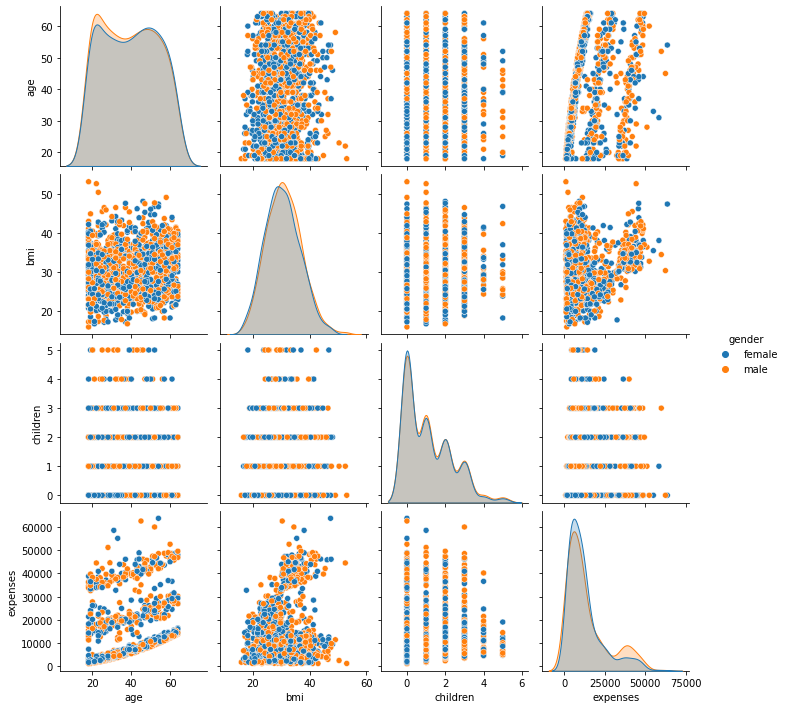

In [44]:
sns.pairplot(data=df,hue='gender')

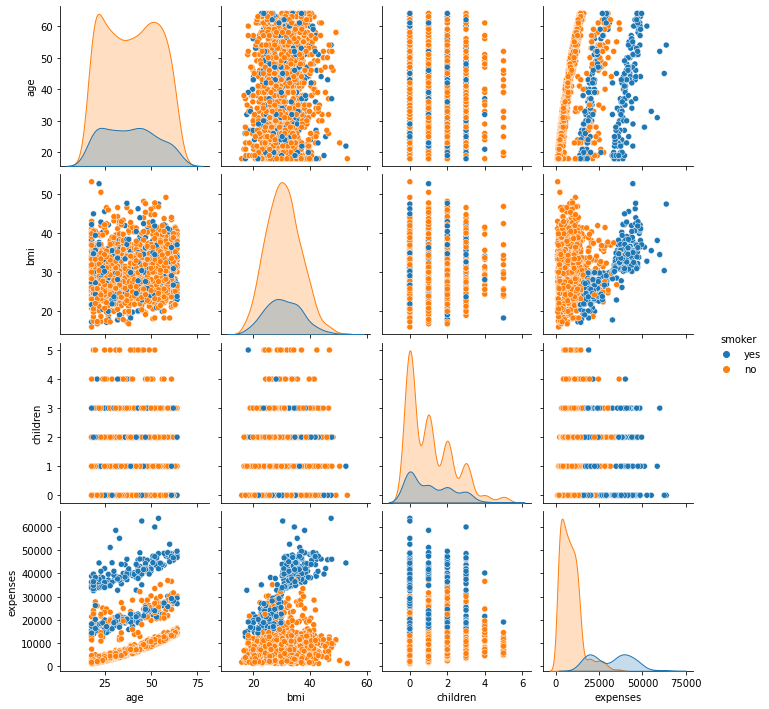

In [45]:
sns.pairplot(data=df,hue='smoker')

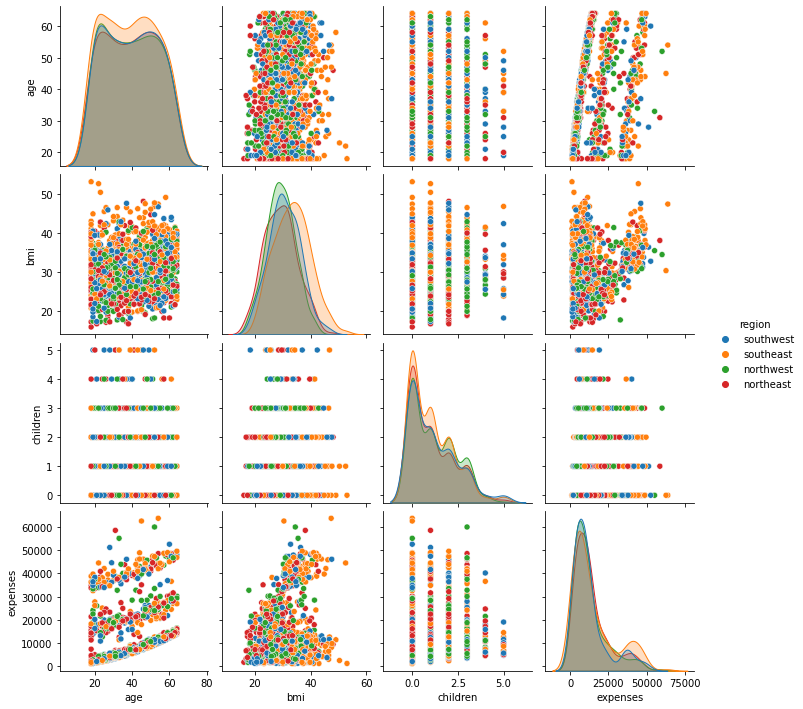

In [46]:
sns.pairplot(data=df,hue='region')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

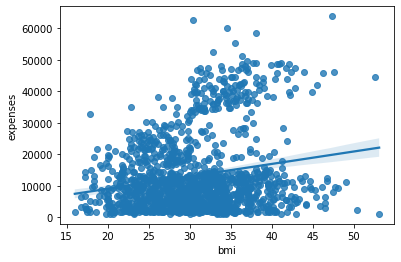

In [47]:
sns.regplot(x=df['bmi'], y=df['expenses'])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

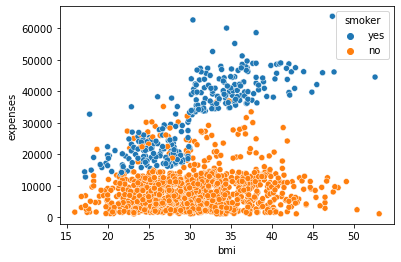

In [48]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue=df['smoker'])

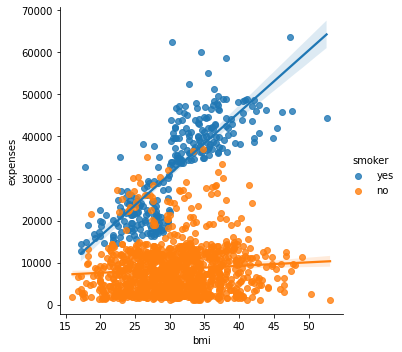

In [49]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

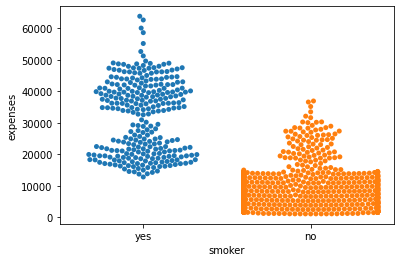

In [50]:
sns.swarmplot(x=df['smoker'],
              y=df['expenses'])

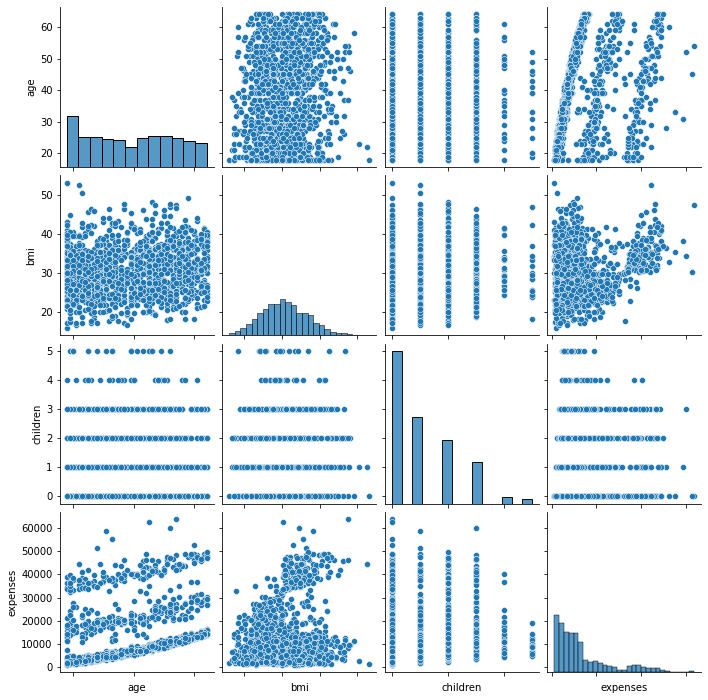

In [51]:
import seaborn as sns
g = sns.pairplot(df)
g.set(xticklabels=[])

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
cat_col=['smoker','region','gender']
num_col=[i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [53]:
one_hot=pd.get_dummies(df[cat_col])
insur_procsd_df=pd.concat([df[num_col],one_hot],axis=1)
insur_procsd_df.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,gender_female,gender_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


In [54]:
insr_procsd_df_label=df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


In [55]:
X=insur_procsd_df.drop(columns='expenses')
y=df[['expenses']]
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1234)
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()